In [1]:
'''
从一些网站的 API 获取数据
'''
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.finance import candlestick_ohlc
from datetime import datetime

# 字符串转日期
def strToDate(dateStr):
    return datetime.strptime(dateStr, '%Y%m%d')

# 获取股票数据
def getStockData(inc, convertDate = True):
    url = 'http://chartapi.finance.yahoo.com/instrument/1.0/' + inc +'/chartdata;type=quote;range=20m/csv'
    data_source = urllib.request.urlopen(url).read().decode('utf-8')
    split_source = data_source.split('\n')
    stock_data = []
    for line in split_source:
        split_line = line.split(',')
        if (len(split_line) == 6) and 'close' not in line and 'labels' not in line:
            stock_data.append(line)
    date1, closep, highp, lowp, openp, volume = np.loadtxt(stock_data, delimiter = ',', unpack = True)
    if convertDate:
        dates = [strToDate(str(int(date))) for date in date1]
        return dates,closep, highp, lowp, openp, volume
    return date1, closep, highp, lowp, openp, volume

# 普通 pyplot 来绘制。
def grap_data(inc, title = None):
    dates, closep, highp, lowp, openp, volume = getStockData(inc)
    plt.plot_date(dates, closep, '-', label='Close Price')
    plt.legend()
    plt.title(title or inc)
    plt.show()

# 用 sub_plot 来绘制。
def grap_data_figure(inc, title = None):
    dates, closep, highp, lowp, openp, volume = getStockData(inc)
    fig = plt.figure()
    ax1 = plt.subplot2grid((1, 1), (0, 0))
    ax1.plot_date(dates, closep,'-', label='Close Price')
    # x 轴上的 lable 调整。
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax1.grid(True)
    
    plt.legend()
    plt.title(title or inc)
    plt.subplots_adjust(left = 0.09,
                       bottom = 0.20,
                       right = 0.94,
                       top = 0.95,
                       wspace=0.2,
                       hspace=0.2)
    plt.show()

# 全用填充方式绘制出收益和损失
def grap_stock_balance(inc):
    dates, closep, highp, lowp, openp, volume = getStockData(inc)
    fig = plt.figure()
    ax1 = plt.subplot2grid((1, 1), (0, 0))
    ax1.fill_between(dates, closep, closep[0], alpha=0.2, where=(closep > closep[0]), facecolor='g')
    ax1.fill_between(dates, closep, closep[0], alpha=0.2, where=(closep < closep[0]), facecolor='r')
    
    # label trick
    ax1.scatter([],[], linewidth = 5, label = 'Loss', color = 'r', alpha = 0.2)
    ax1.scatter([],[], linewidth = 5, label = 'Gain', color = 'g', alpha = 0.2)
    
    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)
    
    plt.legend()
    plt.show()

# plot candlestick chart 阴阳烛图
def grap_stock_candlestick(inc):
    dates, closep, highp, lowp, openp, volume = getStockData(inc, False)
    y = []
    numDates = len(dates)
    for i in range(numDates):
        append_me = dates[i], openp[i], highp[i], lowp[i], closep[i], volume[i]
        y.append(append_me)
 
    fig = plt.figure()
    ax1 = plt.subplot2grid((1, 1), (0, 0))
    candlestick_ohlc(ax1, y)
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


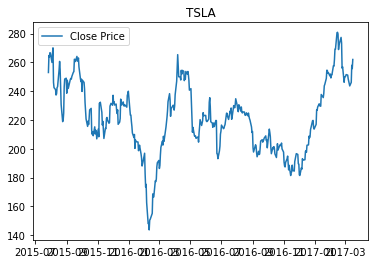

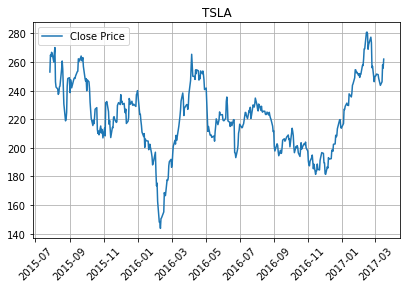

In [2]:
'''
TSLA Stock
'''
grap_data('TSLA')
grap_data_figure('TSLA')

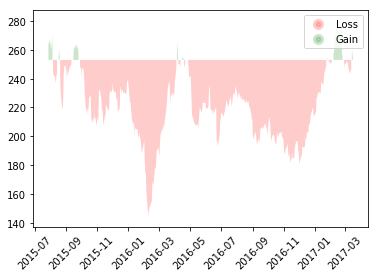

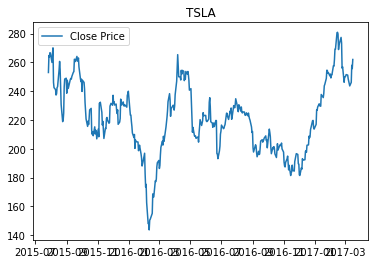

In [3]:
'''
更多的绘制方法， more customization colors and fill
'''
grap_stock_balance('tsla')
grap_data('TSLA')

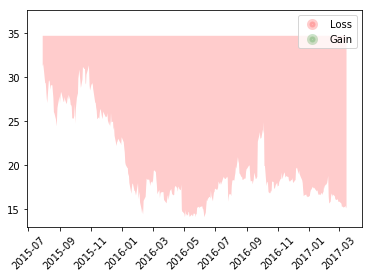

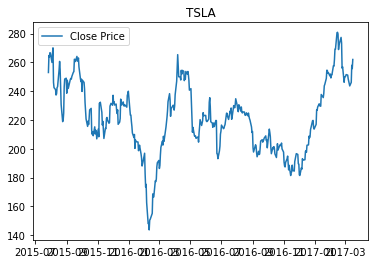

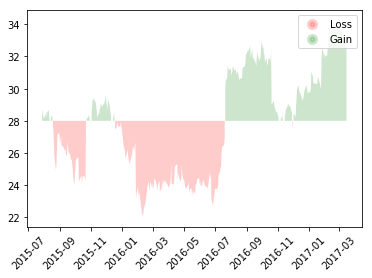

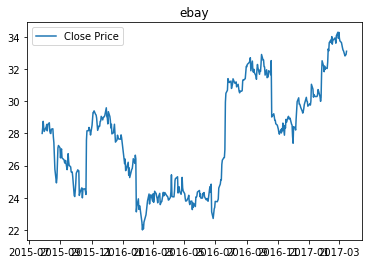

In [4]:
'''
更多的绘制方法， more customization colors and fill
'''
grap_stock_balance('twtr')
grap_data('TSLA')
grap_stock_balance('ebay')
grap_data('ebay')

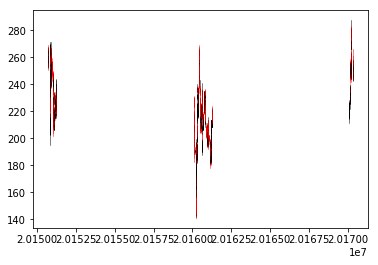

In [5]:
'''
阴阳烛图 candlestick_chart
'''
grap_stock_candlestick('TSLA')